In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

   Before doing any analysis it would be a good idea to check for any hypens or other symbols the data set and make appropriate replacements to make sure you can perform arithmetic operations on the data. Prepare a short report to answer the following questions:

1.Which are the teams which started playing between 1930-1980?

2.Which are the top 5 teams in terms of points?

3.What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

4.Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [3]:
#importing dataset and assign column names
columns=['Pos','Team','Seasons','Points','GamesPlayed','GamesWon','GamesDrawn','GamesLost','GoalsFor','GoalsAgainst','Champion','Runner-up','Third','Fourth','Fifth','Sixth','T',
         
         'Debut','Since/LastApp','BestPosition']
lal=pd.read_csv('C:/Users/Eeshwari/Desktop/GreatLearning/Laliga.csv',names=columns)
game=lal.drop(lal.index[[0,1]]) #droping first row
game.head()


,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
2,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
3,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
4,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
5,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
6,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [4]:
game.shape

(61, 20)

In [5]:
# 1.Which are the teams which started playing between 1930-1980?

s=game['Debut'].astype(str).str[:4].astype('int', copy=True, errors= 'ignore')

b=s.between(1930, 1980)
print('Number of them started between 1930-1980 are:',game[b].shape[0],'teams')

Number of them started between 1930-1980 are: 37 teams


In [6]:
# 2.Which are the top 5 teams in terms of points?
df=game.sort_values(by='Points',ascending=False).head(5)

print('Top 5 teams in terms of points:\n\n',df[['Team','Points']])

Top 5 teams in terms of points:

            Team Points
22   Villarreal    970
47  Real Burgos     96
48    Gimnastic     91
49  Extremadura     83
50       Merida     81


In [7]:
game[['GamesPlayed','GamesWon']].isnull().sum()#checking for null values 

GamesPlayed    0
GamesWon       0
dtype: int64

In [8]:
game.GamesWon.values

array(['1647', '1581', '1241', '1187', '1209', '990', '948', '864', '698',
       '606', '563', '586', '463', '453', '471', '426', '390', '408',
       '333', '367', '266', '218', '189', '203', '147', '184', '155',
       '145', '125', '113', '123', '129', '104', '96', '103', '76', '62',
       '82', '52', '50', '59', '53', '37', '35', '43', '26', '34', '20',
       '19', '30', '29', '21', '17', '18', '13', '8', '8', '7', '7', '5',
       '-'], dtype=object)

In [10]:
#replacing Nan and special characters
game['GamesPlayed'].replace('-','0',inplace=True)


In [11]:
game['GamesWon'].replace('-','0',inplace=True)

In [12]:
game['GamesPlayed']=game['GamesPlayed'].astype(int)
game['GamesWon']=game['GamesWon'].astype(int)

In [13]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 2 to 62
Data columns (total 20 columns):
Pos              61 non-null object
Team             61 non-null object
Seasons          61 non-null object
Points           61 non-null object
GamesPlayed      61 non-null int32
GamesWon         61 non-null int32
GamesDrawn       61 non-null object
GamesLost        61 non-null object
GoalsFor         61 non-null object
GoalsAgainst     61 non-null object
Champion         61 non-null object
Runner-up        61 non-null object
Third            61 non-null object
Fourth           61 non-null object
Fifth            61 non-null object
Sixth            61 non-null object
T                61 non-null object
Debut            61 non-null object
Since/LastApp    61 non-null object
BestPosition     61 non-null object
dtypes: int32(2), object(18)
memory usage: 9.5+ KB


In [14]:
# 3.What is the distribution of the winning percentage for all teams?
# Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)


 
game['Winning_percent']=((game['GamesWon'])/(game['GamesPlayed']))
game.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,Winning_percent
2,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,0.596307
3,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,0.572411
4,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2002-03,1,0.474751
5,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931-32,1987-88,1,0.445571
6,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,0.437726


2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

a)Calculate the estimated standard error of the sample mean? What does the standard error indicate?
b)Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.




In [15]:
bp=np.random.randint(60,65,size=200)#200sample; taking age between 60-65
bp#random sample

array([61, 62, 63, 64, 62, 61, 62, 60, 64, 61, 62, 60, 61, 61, 61, 62, 63,
       63, 63, 64, 63, 62, 61, 62, 62, 64, 63, 60, 60, 62, 64, 61, 62, 62,
       62, 60, 61, 64, 61, 60, 60, 61, 60, 64, 64, 60, 60, 61, 61, 61, 63,
       60, 60, 62, 62, 61, 62, 64, 62, 63, 63, 63, 64, 60, 60, 64, 62, 62,
       60, 60, 62, 61, 61, 63, 62, 60, 61, 60, 64, 64, 60, 61, 63, 63, 62,
       61, 61, 63, 62, 61, 64, 61, 64, 64, 61, 62, 64, 61, 62, 62, 64, 60,
       63, 61, 62, 62, 64, 60, 62, 60, 60, 62, 62, 60, 64, 61, 60, 61, 61,
       64, 64, 61, 62, 61, 60, 62, 62, 64, 64, 61, 60, 61, 63, 62, 61, 61,
       60, 62, 61, 64, 60, 61, 64, 62, 62, 60, 62, 62, 60, 63, 63, 63, 61,
       64, 61, 61, 64, 62, 60, 61, 64, 63, 62, 64, 60, 64, 61, 61, 60, 64,
       64, 64, 61, 64, 60, 61, 62, 61, 63, 64, 64, 62, 64, 62, 60, 62, 63,
       64, 63, 63, 62, 64, 61, 61, 62, 62, 60, 63, 60, 60])

In [16]:
xbar=140#mean
sd=25

from scipy import stats
stats.sem(bp)#standard error


0.09858228713457311

The standard error of the mean is the standard deviation of the sampling distribution of the mean.


In [17]:
se=25/np.sqrt(200) 

#confidence interval

stats.norm.interval(0.95,loc=140,scale=se)

(136.5352404391258, 143.4647595608742)

In [18]:
# stats.norm.isf(0.95,loc=140,scale=se)
# stats.norm.isf(0.05,loc=140,scale=se)

c)Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [19]:
se=25/np.sqrt(100)
stats.norm.interval(0.95,loc=140,scale=se)

(135.10009003864985, 144.89990996135015)

d)Which of the two above intervals are wider?

#### When the Sample size has decreased the interval got wider that indicates the scope became higher.

e)Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

#### The size of a  sample affects the standard error for that sample. Because it is inversely proportional in the standard error formula, the standard error decreases as sample size increases. So having more data gives less variation and more precision in our results.


1. Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.
2. Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
3. What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [20]:
from scipy.stats import ttest_1samp,ttest_ind,levene,shapiro,iqr,mannwhitneyu,wilcoxon,iqr
from statsmodels.stats.power import ttest_power
import scipy.stats as stats

In [21]:
golf=pd.read_csv('C:/Users/Eeshwari/Desktop/GreatLearning/Golf.csv')

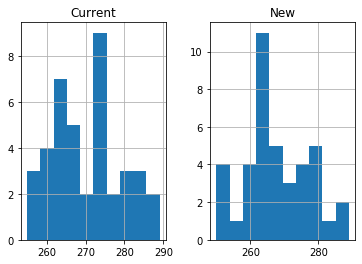

In [22]:
golf.hist()
plt.show()

Null Hypothesis:

H0:µold−µnew=0 (New coating does not have effect on driving distances)

Alternate Hypothesis:

H1:µold−µnew≠0 (New coating does have significant effect on driving distances)

In [23]:
golf.mean()


Current    270.275
New        267.500
dtype: float64

In [24]:
np.std(golf,ddof=1)

Current    8.752985
New        9.896904
dtype: float64

In [25]:
mu=2
print("Observed sample mean")
xbar= golf.mean()

s=np.std(golf,ddof=1)
n=40
se=s/np.sqrt(n)
print(se)
print()
print("Critical Values")
print(stats.t.isf(0.05,df=n-1,loc=mu,scale=se))
print(stats.t.isf(0.95,df=n-1,loc=mu,scale=se))
print()
print("T-Statistic")
print((xbar-mu)/se)

Observed sample mean
Current    1.383968
New        1.564838
dtype: float64

Critical Values
[4.33181396 4.6365566 ]
[-0.33181396 -0.6365566 ]

T-Statistic
Current    193.844741
New        169.666126
dtype: float64


In [26]:
stats.ttest_ind(golf['Current'],golf['New'])

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18793228491854663)

Here p value is 0.188 which is greater than the 0.05.

Hence, we failed to reject the Null Hypothesis.

Thus, accepting the Null Hypothesis that there is no significant change in driving distances due to the new coating.

In [27]:
mu=2
print("Observed sample mean")
xbar= golf.mean()

s=np.std(golf,ddof=1)
n=40
se=s/np.sqrt(n)
print(se)
print()
diff=xbar[0]-xbar[1]
print('Diff between Means of population',diff,'\n')
print("Critical Values")
print(stats.t.isf(0.05,df=n-1,loc=mu,scale=se))
print(stats.t.isf(0.95,df=n-1,loc=mu,scale=se))
print()
print("T-Statistic")
print((diff-mu)/se)


Observed sample mean
Current    1.383968
New        1.564838
dtype: float64

Diff between Means of population 2.7749999999999773 

Critical Values
[4.33181396 4.6365566 ]
[-0.33181396 -0.6365566 ]

T-Statistic
Current    0.559984
New        0.495259
dtype: float64


The difference in sample means is used to estimate the difference in population means. The accuracy of the estimate is revealed by a confidence interval.

In order to construct a confidence interval, we are going to make three assumptions:

 

The two populations have the same variance. This assumption is called the assumption of homogeneity of variance.
The populations are normally distributed.
Each value is sampled independently from each other value